In [1]:
%matplotlib inline

from __future__ import annotations

import math
from typing import Any

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.markers as markers
import pandas
import numpy
import seaborn

from matplotlib.ticker import ScalarFormatter

# to change default colormap
plt.rcParams["image.cmap"] = "tab10"
# to change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)

In [2]:
PROXYSTORE = 'Proxify'

NODES = [8, 128, 256, 512, 1024]
DATA = {
    'Baseline': {
        'CPU': [0.8646902807438533, 0.9269573068818762, 0.8966170705131524, 0.6218489915664105, 0.37615390430619705],
        'GPU': [0.6796688040980168, 0.6830119733745553, 0.6885930245770308, 0.6718035129672266, 0.6711664536459054], 
    },
    PROXYSTORE: {
        'CPU': [0.9037363629501167, 0.9452118492686217, 0.9469055766535985, 0.8713959708739601, 0.44735455314792083],
        'GPU': [0.7997412334690767, 0.7926567447094113, 0.8052310308176625, 0.7398836099119497, 0.7013267885288375],
    }
}

if True:
    NODES = NODES[1:-1]
    for config, tasks in DATA.items():
        for system, utils in tasks.items():
            DATA[config][system] = utils[1:-1]

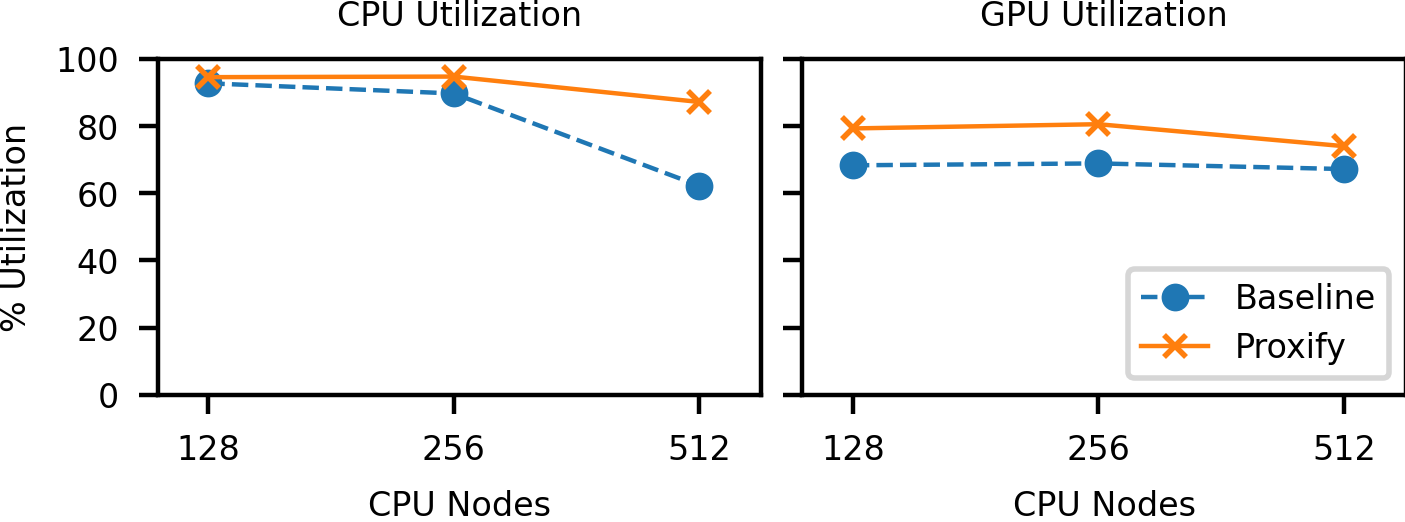

In [3]:
MARKERS = ('o', 'x')
LINES = ('--', '-')
cmap = plt.get_cmap()

fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)

for i, (config, tasks) in enumerate(DATA.items()):
    for j, (system, utils) in enumerate(tasks.items()):
        # utils = [u * 100 for u in utils]
        x = NODES
        y = [u * 100 for u in utils]
        
        axs[j].plot(
            x,
            y,
            linestyle=LINES[i],
            marker=MARKERS[i],
            # color=cmap(j),
            label=config,
        )

        axs[j].set_xlabel('CPU Nodes')

axs[0].set_title('CPU Utilization')
axs[0].set_ylabel('% Utilization')
axs[0].set_xscale('log', base=2)
axs[0].set_xticks(NODES)
for axis in [axs[0].xaxis, axs[0].yaxis]:
    axis.set_major_formatter(ScalarFormatter())
axs[0].set_xlim([111, 610])
axs[0].set_ylim([0, 100])

axs[1].set_title('GPU Utilization')
axs[1].legend(loc='lower right')

fig.tight_layout(w_pad=1)

fig.set_size_inches(3.5, 1)
plt.savefig('figures/moldesign-scaling-v1.pdf', pad_inches=0.05)

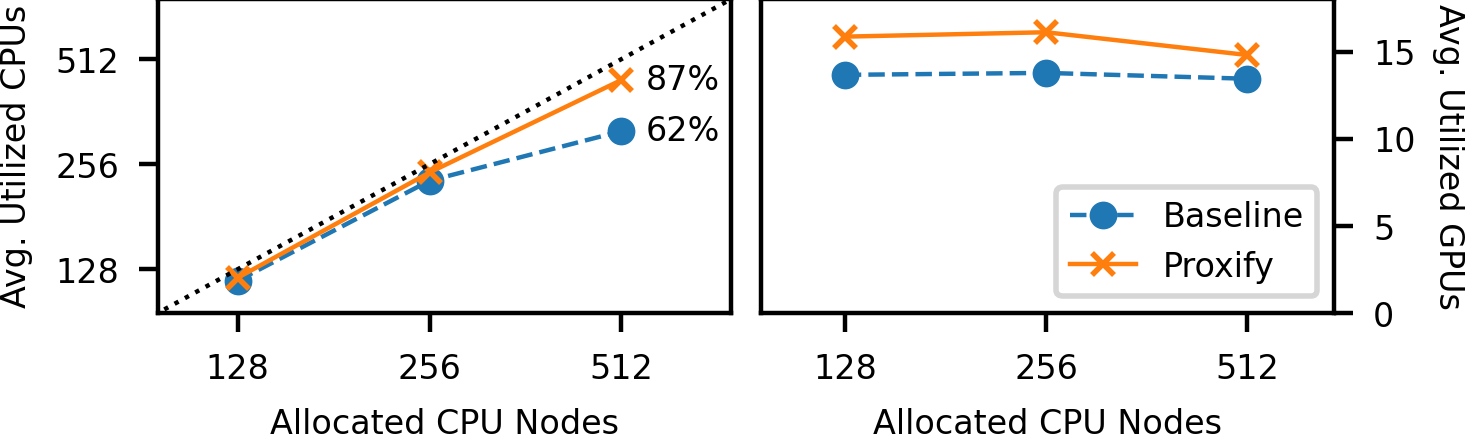

In [62]:
MARKERS = ('o', 'x')
LINES = ('--', '-')
cmap = plt.get_cmap()

fig, axs = plt.subplots(1, 2)

for i, (config, tasks) in enumerate(DATA.items()):
    for j, (system, utils) in enumerate(tasks.items()):
        # utils = [u * 100 for u in utils]
        x = NODES
        
        if system == 'CPU':
            y = [u * x[k] for k, u in enumerate(utils)]
        else:
            y = [u * 20 for u in utils]
        
        axs[j].plot(
            x,
            y,
            linestyle=LINES[i],
            marker=MARKERS[i],
            # color=cmap(j),
            label=config,
        )

        axs[j].set_xlabel('Allocated CPU Nodes')


axs[0].set_ylabel('Avg. Utilized CPUs')
axs[0].set_xscale('log', base=2)
axs[0].set_yscale('log', base=2)
axs[0].set_xticks(NODES)
axs[0].set_yticks([8, 16, 32, 64, 128, 256, 512, 1024])
for axis in [axs[0].xaxis, axs[0].yaxis]:
    axis.set_major_formatter(ScalarFormatter())
axs[0].plot((0, 2048), (0, 2048), color='black', linestyle = ':', label='Ideal')
# axs[0].set_xlim([5, 740])
# axs[0].set_ylim([5, 740])
axs[0].set_xlim([96, 760])
axs[0].set_ylim([96, 760])


axs[1].set_ylabel('Avg. Utilized GPUs', rotation=270, labelpad=9)
# axs[1].axhline(y=20, color='black', linestyle = ':', label='Ideal')
axs[1].set_yticks([0, 5, 10, 15])
axs[1].set_xscale('log', base=2)
axs[1].set_ylim([0, 18])
axs[1].set_xlim([96, 690])
axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")
for axis in [axs[1].xaxis, axs[1].yaxis]:
    axis.set_major_formatter(ScalarFormatter())

x1, y1 = NODES[-1], DATA[PROXYSTORE]['CPU'][-1]
x2, y2 = NODES[-1], DATA['Baseline']['CPU'][-1]
axs[0].annotate(
    f'{y1 * 100:.0f}%',
    xy=(490, 480),
    xytext=(x1*1.25, x1*y1),
    # arrowprops=dict(facecolor='black', arrowstyle="-|>",mutation_scale=5),
    fontsize=6,
    va="center",
    ha="center"
)
axs[0].annotate(
    f'{y2 * 100:.0f}%',
    xy=(512, 290),
    xytext=(x2*1.25, x2*y2),
    # arrowprops=dict(facecolor='black', arrowstyle="-|>",mutation_scale=5),
    fontsize=6,
    va="center",
    ha="center"
)

axs[1].legend(loc='lower right')

fig.tight_layout(w_pad=1)

fig.set_size_inches(3.5, 0.9)
plt.savefig('figures/moldesign-scaling-v2.pdf', pad_inches=0.05)